In [261]:
# 角速度の平面成分と加速度の平面成分を用いてZ軸を基準に原点で回転させることで歩行を補正する

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_fontja
import numpy as np
from scipy import signal

# acce_file_path = './PDR_1/Accelerometer.csv'
# gyro_file_path = './PDR_1/Gyroscope.csv'
acce_file_path = 'data/acc.csv'
gyro_file_path = 'data/gyro.csv'

acce_data = pd.read_csv(acce_file_path,names=['timestamp','x','y','z'], header=0)
gyro_data = pd.read_csv(gyro_file_path,names=['timestamp','x','y','z'], header=0)

# 2sから9sまでのデータに絞る
# acce_data = acce_data[(acce_data['timestamp'] >= 2.0) & (acce_data['timestamp'] <= 9.0)]
# gyro_data = gyro_data[(gyro_data['timestamp'] >= 2.0) & (gyro_data['timestamp'] <= 9.0)]
acce_data = acce_data[(acce_data['timestamp'] >= 40) & (acce_data['timestamp'] <= 77.5)]
gyro_data = gyro_data[(gyro_data['timestamp'] >= 40) & (gyro_data['timestamp'] <= 77.5)]

# acce_data = acce_data[(acce_data['timestamp'] >= 30) & (acce_data['timestamp'] <= 90)]
# gyro_data = gyro_data[(gyro_data['timestamp'] >= 30) & (gyro_data['timestamp'] <= 90)]

# indexをリセット
acce_data = acce_data.reset_index(drop=True)
gyro_data = gyro_data.reset_index(drop=True)

In [262]:
# # 加速度と角速度のグラフを横に並べて表示
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# # 加速度
# axes[0].plot(acce_data['timestamp'], acce_data['x'], label='X')
# axes[0].plot(acce_data['timestamp'], acce_data['y'], label='Y')
# axes[0].plot(acce_data['timestamp'], acce_data['z'], label='Z')
# axes[0].set_xlabel('Time [s]')
# axes[0].set_ylabel('Acceleration [m/s^2]')
# axes[0].set_title('Accelerometer Data')
# axes[0].legend()
# axes[0].grid()

# # 角速度
# axes[1].plot(gyro_data['timestamp'], gyro_data['x'], label='X')
# axes[1].plot(gyro_data['timestamp'], gyro_data['y'], label='Y')
# axes[1].plot(gyro_data['timestamp'], gyro_data['z'], label='Z')
# axes[1].set_xlabel('Time [s]')
# axes[1].set_ylabel('Angular Velocity [deg/s]')
# axes[1].set_title('Gyroscope Data')
# axes[1].legend()
# axes[1].grid()

# plt.tight_layout()
# plt.show()

## 加速度

X軸は重力加速度方向を向いている
平面加速度成分は(Y,Z)

## 角速度

加速度の値より、角速度の平面成分はX軸である


[80, 339, 575, 818, 1062, 1322, 1578, 1840, 2133, 2393, 2642, 2889, 3133, 3362, 3599, 3830, 4077, 4311, 4547, 4785, 5021, 5262, 5493, 5723, 5984, 6219, 6464, 6706, 6979, 7228, 7481, 7719, 7959, 8194, 8439, 8665, 8916, 9145, 9371, 9589, 9826, 10049, 10291, 10522, 10806, 11041, 11308, 11510, 11774, 11964, 12193, 12423, 12657, 12877, 13118, 13336, 13564, 13792, 14025, 14250, 14482, 14709, 14943, 15183, 15459, 15685]
[141, 209, 393, 447, 628, 679, 878, 1120, 1170, 1232, 1379, 1633, 1707, 2226, 2480, 2697, 2980, 3237, 3420, 3480, 3705, 3893, 3996, 4130, 4203, 4369, 4431, 4602, 4669, 4845, 5078, 5169, 5319, 5550, 5642, 5787, 6040, 6116, 6275, 6330, 6557, 6763, 7072, 7279, 7345, 7535, 7599, 7779, 7857, 8101, 8252, 8493, 8729, 8800, 9000, 9052, 9260, 9490, 9712, 9914, 9967, 10110, 10210, 10347, 10397, 10584, 10756, 10894, 10946, 11151, 11254, 11371, 11604, 11720, 11833, 12024, 12122, 12297, 12480, 12531, 12710, 12763, 12938, 13168, 13394, 13453, 13617, 13888, 13947, 14121, 14341, 14569, 14800,

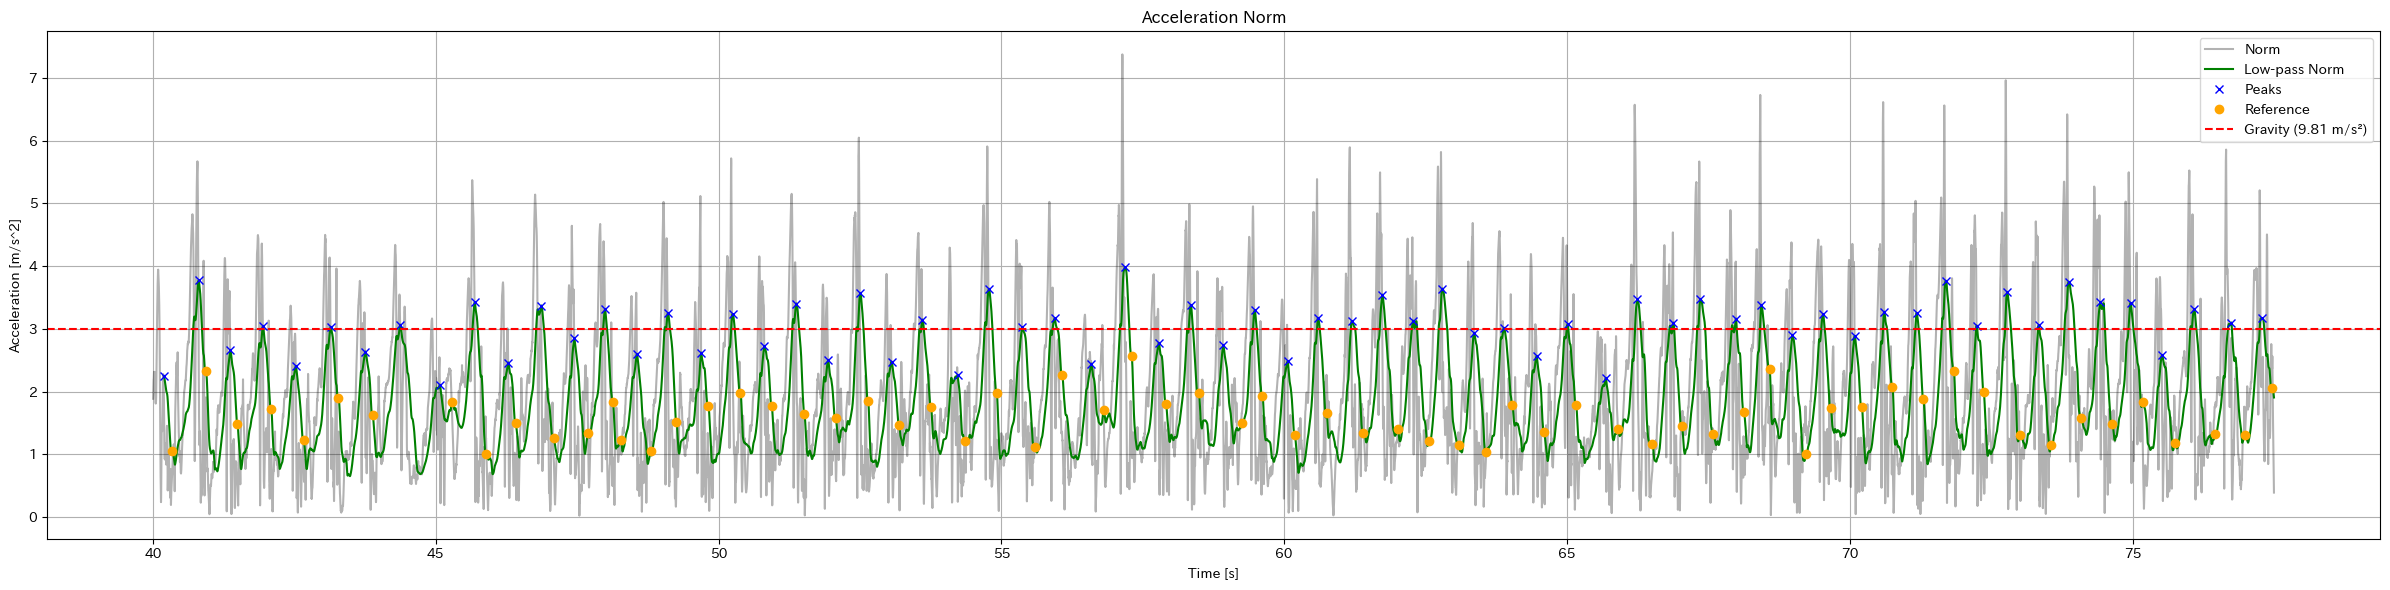

In [263]:
# ノルムの算出
acce_data['norm'] = np.sqrt(acce_data['y']**2 + acce_data['z']**2)
acce_data['low_norm'] = acce_data['norm'].rolling(window=80).mean()

peak,_ = signal.find_peaks(acce_data['low_norm'], height=2, distance=100)
peak_under,_ = signal.find_peaks(acce_data['low_norm'], height=1, distance=50)
# peak_underからpeakと同じものがあったら削除
peak_under = [p for p in peak_under if p not in peak]
print([int(peak) for peak in peak])
print([int(peak_under_int) for peak_under_int in peak_under])

# peak_under が peak よりも大きい場合は次の peak_under を gensoku_index に追加
gensoku_index = []
peak_under_index = 0

for peak_under_int in peak_under:
    if peak_under_int < peak[peak_under_index]:
        continue
    if peak_under_int > peak[peak_under_index]:
        gensoku_index.append(peak_under_int)
        peak_under_index += 1
    if peak_under_index >= len(peak):
        break
    if peak_under_int > peak[-1]:
        break


fig, axes = plt.subplots(1, 1, figsize=(24, 6))
# ノルム
axes.plot(acce_data['timestamp'], acce_data['norm'], label='Norm', color='black', alpha=0.3)
axes.plot(acce_data['timestamp'], acce_data['low_norm'], label='Low-pass Norm', color='green')
axes.plot(acce_data['timestamp'].iloc[peak], acce_data['low_norm'].iloc[peak], 'x', label='Peaks', color='blue')
axes.plot(acce_data['timestamp'].iloc[gensoku_index], acce_data['low_norm'].iloc[gensoku_index], 'o', label='Reference', color='orange')
# axes.plot(acce_data['timestamp'].iloc[peak_under], acce_data['low_norm'].iloc[peak_under], 'o', label='Reference', color='orange')
axes.axhline(y=3.0, color='red', linestyle='--', label='Gravity (9.81 m/s²)')
axes.set_xlabel('Time [s]')
axes.set_ylabel('Acceleration [m/s^2]')
axes.set_title('Acceleration Norm')
axes.legend()
axes.grid()

plt.tight_layout()
plt.show()

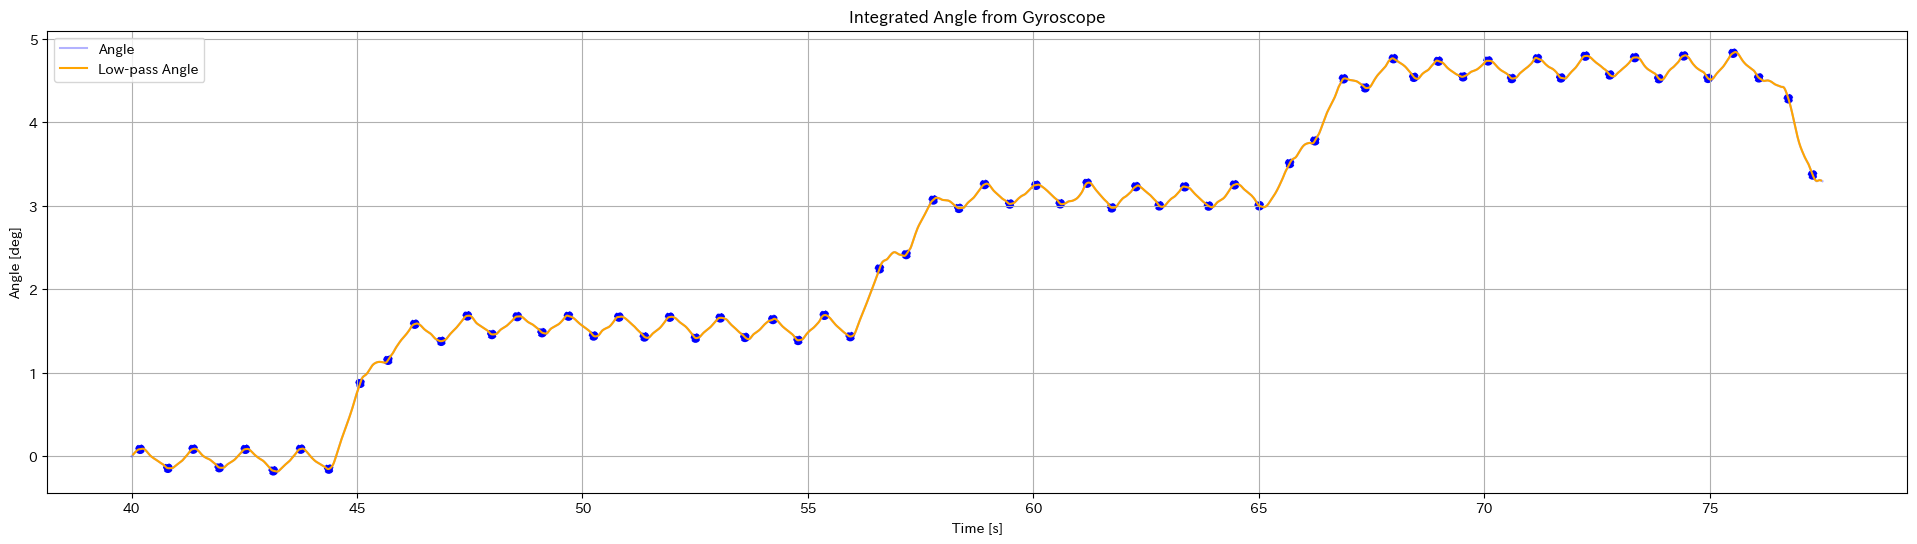

In [264]:
# 角速度の平面成分を積分して角度を求める
gyro_data['angle'] = np.cumsum(gyro_data['x']) / (len(gyro_data) / (gyro_data['timestamp'].iloc[-1] - gyro_data['timestamp'].iloc[0]))
gyro_data['low_angle'] = gyro_data['angle'].rolling(window=30, center=True).mean()

fig = plt.figure(figsize=(24, 6))
plt.plot(gyro_data['timestamp'], gyro_data['angle'], label='Angle', color='blue', alpha=0.3)
plt.plot(gyro_data['timestamp'], gyro_data['low_angle'], label='Low-pass Angle', color='orange')
for i in range(len(peak)):
	plt.scatter(gyro_data['timestamp'].iloc[peak[i]], gyro_data['low_angle'].iloc[peak[i]], color='blue', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Angle [deg]')
plt.title('Integrated Angle from Gyroscope')
plt.legend()
plt.grid()
plt.show()

[-0.06412573  1.88624237  0.        ] [0.63735072 0.17131253 0.        ]
Step 1: rad0.38827588284378867, deg22.2465693736651
[-0.09573723  1.96846676  0.        ] [ 0.64799675 -1.77030715  0.        ]
Step 2: rad0.19636127622311528, deg11.250672387387068
[-0.13497748  2.05564786  0.        ] [-0.45425973 -0.14166417  0.        ]
Step 3: rad-0.1442959417008136, deg-8.267548460322399
[-0.17655798  2.10348589  0.        ] [ 0.31342869 -1.01921733  0.        ]
Step 4: rad0.1556419821233037, deg8.91762869071591
[-0.21142372  2.18138345  0.        ] [-0.27333652 -0.75451888  0.        ]
Step 5: rad-0.021085041605916732, deg-1.2080838948767723
[-0.20693689  2.19540653  0.        ] [ 0.51568122 -1.21402376  0.        ]
Step 6: rad0.20885610957302614, deg11.966573604056268
[-0.22080545  2.25917156  0.        ] [-0.88629629  0.15751357  0.        ]
Step 7: rad-0.3066615350560369, deg-17.570411697714054
[-0.26801524  2.29701577  0.        ] [-1.56343112  0.12034321  0.        ]
Step 8: rad-0.5368

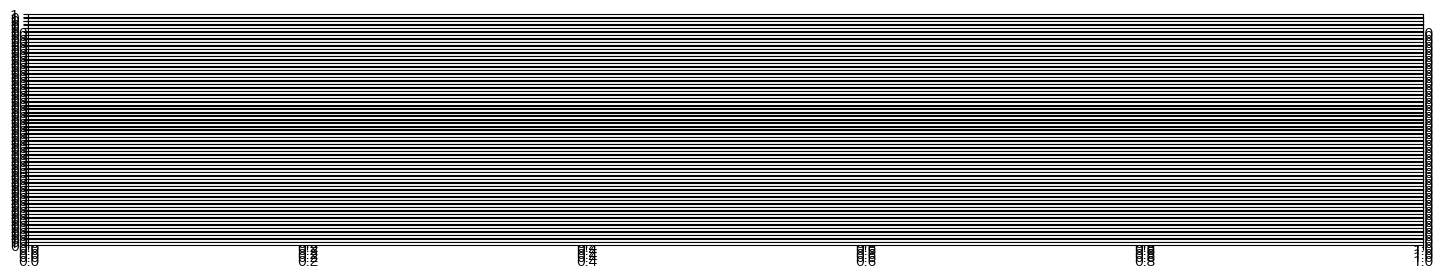

In [265]:
# 一歩ずつの加速度の方向をプロットする
rad_angle_list = []
# fig, axes = plt.subplots(len(peak), 1,figsize=(18, len(peak)*3))
fig, axes = plt.subplots(len(peak), 1,figsize=(18, 3))
for i in range(peak.shape[0]):
	second_i = gensoku_index[i]
	# axes[i].quiver(acce_data['y'].iloc[i], acce_data['z'].iloc[i], acce_data['y'].iloc[second_i] - acce_data['y'].iloc[i], acce_data['z'].iloc[second_i] - acce_data['z'].iloc[i], angles='xy', scale_units='xy', scale=1, color='red')
	# axes[i].plot([acce_data['y'].iloc[i], acce_data['y'].iloc[second_i]], [acce_data['z'].iloc[i], acce_data['z'].iloc[second_i]], color='red')
	# axes[i].vlines(acce_data['y'].iloc[second_i], 0, 5, colors='blue', linestyles='dashed', label='Y=1')
	# z軸を基準に回転させる

	start = np.array([acce_data['y'].iloc[i], acce_data['z'].iloc[i], 0])
	end = np.array([acce_data['y'].iloc[second_i], acce_data['z'].iloc[second_i], 0])
	shift_mat = np.array([[np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), -np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [np.sin(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])),  np.cos(np.deg2rad(-gyro_data['low_angle'].iloc[peak[i]])), 0],
						  [0, 0, 1]])
	shift_start = shift_mat @ start
	shift_end = shift_mat @ end
	# axes[i].plot([shift_start[0], shift_end[0]], [shift_start[1], shift_end[1]], color='green')
	print(shift_start, shift_end)

	# rad_angle = np.arctan2(shift_end[1] - shift_start[1], shift_end[0] - shift_start[0]) - np.pi/2
	rad_angle = np.arctan2(shift_end[1] - shift_start[1], shift_end[0] - shift_start[0]) + np.pi/2
	rad_angle_list.append(rad_angle + gyro_data['low_angle'].iloc[peak[i]])
	print(f"Step {i+1}: rad{rad_angle}, deg{np.rad2deg(rad_angle)}")

	
	# # startを原点にしてendをrad_angleだけ回転させる
	# rotated_end = np.array([shift_start[0] + (shift_end[0] - shift_start[0]) * np.cos(-rad_angle) - (shift_end[1] - shift_start[1]) * np.sin(-rad_angle),
	# 						shift_start[1] + (shift_end[0] - shift_start[0]) * np.sin(-rad_angle) + (shift_end[1] - shift_start[1]) * np.cos(-rad_angle),
	# 						0])
	# axes[i].plot([shift_start[0], rotated_end[0]], [shift_start[1], rotated_end[1]], color='purple')

	# axes[i].set_xlim(-2.5, 2.5)
	# axes[i].set_ylim(0, 5)
	# axes[i].set_xlabel('Y Acceleration [m/s^2]')
	# axes[i].set_ylabel('Z Acceleration [m/s^2]')
	# axes[i].set_title(f'Step {i+1}')
	# axes[i].grid()
	# axes[i].set_aspect('equal', adjustable='box')
# plt.tight_layout()
# plt.show()

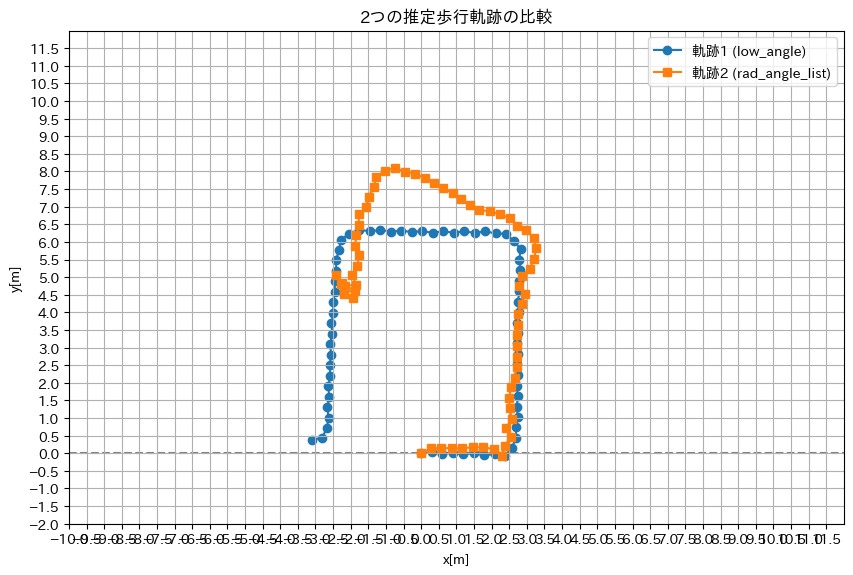

In [266]:
step = 0.3
point = [[0, 0]]
point_only_pdr = [[0, 0]]

# ステップから歩行軌跡を計算(rad_angle_list)
for p in range(len(peak)):
    # 軌跡1: gyro_data['low_angle'] を使用
    x1 = step * np.cos(gyro_data['low_angle'][peak[p]]) + point[-1][0]
    y1 = step * np.sin(gyro_data['low_angle'][peak[p]]) + point[-1][1]
    point.append([x1, y1])
    
    # 軌跡2: rad_angle_list を使用
    x2 = step * np.cos(rad_angle_list[p]) + point_only_pdr[-1][0]
    y2 = step * np.sin(rad_angle_list[p]) + point_only_pdr[-1][1]
    point_only_pdr.append([x2, y2])

# 2つの軌跡をそれぞれDataFrameに変換
point = pd.DataFrame(data=point, columns=['x', 'y'])
point_only_pdr = pd.DataFrame(data=point_only_pdr, columns=['x', 'y'])

# 2つの軌跡の始点を(0,0)に補正
point['x'] = point['x'] - point['x'][0]
point['y'] = point['y'] - point['y'][0]
point_only_pdr['x'] = point_only_pdr['x'] - point_only_pdr['x'][0]
point_only_pdr['y'] = point_only_pdr['y'] - point_only_pdr['y'][0]


# --- 描画 ---
# size = ((-1.5, 3.0), (-1.5,3.0))
size = ((-10, 12), (-2, 12))
plt.figure(figsize=(10, 8)) # グラフサイズを少し大きく

# ★★★ 2つの軌跡をプロット ★★★
plt.plot(point['x'], point['y'], 'o-', label='軌跡1 (low_angle)', zorder=1)
plt.plot(point_only_pdr['x'], point_only_pdr['y'], 's-', label='軌跡2 (rad_angle_list)', zorder=2)


# 軸を揃える
plt.gca().set_aspect('equal', adjustable='box')

plt.title('2つの推定歩行軌跡の比較')
plt.xlabel('x[m]')
plt.ylabel('y[m]')
plt.xticks(np.arange(size[0][0], size[0][1], 0.5))
plt.yticks(np.arange(size[1][0], size[1][1], 0.5))
plt.hlines(0, size[0][0], size[0][1], colors='gray', linestyles='--', zorder=0)
plt.xlim(size[0][0], size[0][1])
plt.ylim(size[1][0], size[1][1])

plt.grid()
plt.legend() # 凡例を表示
plt.show()